In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el DataFrame con los datos de ejemplo
data = {
    'Horas de Estudio': [10, 15, 8, 20, 5, 12, 18, 7, 16, 11, 9, 14, 6, 19, 13, 17, 8, 12, 15, 7],
    'Asistencia (%)': [80, 90, 75, 95, 60, 85, 92, 70, 88, 82, 78, 89, 65, 94, 87, 91, 73, 84, 86, 72],
    'Tareas Completadas (%)': [90, 95, 80, 100, 70, 85, 95, 75, 90, 88, 84, 91, 68, 97, 85, 94, 82, 88, 89, 74],
    'Aprobará': ['Sí', 'Sí', 'No', 'Sí', 'No', 'Sí', 'Sí', 'No', 'Sí', 'Sí', 'No', 'Sí', 'No', 'Sí', 'Sí', 'Sí', 'No', 'Sí', 'Sí', 'No']
}

df = pd.DataFrame(data)

# Convertir las etiquetas a valores binarios para el cálculo de métricas
df['Aprobará_bin'] = df['Aprobará'].apply(lambda x: 1 if x == 'Sí' else 0)

# Separar las características (atributos) y la etiqueta
X = df[['Horas de Estudio', 'Asistencia (%)', 'Tareas Completadas (%)']]
y = df['Aprobará_bin']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [6]:
df

,Horas de Estudio,Asistencia (%),Tareas Completadas (%),Aprobará,Aprobará_bin
0,10,80,90,Sí,1
1,15,90,95,Sí,1
2,8,75,80,No,0
3,20,95,100,Sí,1
4,5,60,70,No,0
5,12,85,85,Sí,1
6,18,92,95,Sí,1
7,7,70,75,No,0
8,16,88,90,Sí,1
9,11,82,88,Sí,1


In [2]:
# Entrenar un modelo de árbol de decisión sin restricciones
model_unrestricted = DecisionTreeClassifier()
model_unrestricted.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_unrestricted = model_unrestricted.predict(X_train)
y_pred_test_unrestricted = model_unrestricted.predict(X_test)

# Evaluar el modelo
accuracy_train_unrestricted = accuracy_score(y_train, y_pred_train_unrestricted)
accuracy_test_unrestricted = accuracy_score(y_test, y_pred_test_unrestricted)

print("Árbol de Decisión Sin Restricciones:")
print(f"Precisión en el conjunto de entrenamiento: {accuracy_train_unrestricted:.2f}")
print(f"Precisión en el conjunto de prueba: {accuracy_test_unrestricted:.2f}")


Árbol de Decisión Sin Restricciones:
Precisión en el conjunto de entrenamiento: 1.00
Precisión en el conjunto de prueba: 0.83


In [3]:
# Entrenar un modelo de árbol de decisión con profundidad máxima limitada
model_limited_depth = DecisionTreeClassifier(max_depth=3)
model_limited_depth.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_limited_depth = model_limited_depth.predict(X_train)
y_pred_test_limited_depth = model_limited_depth.predict(X_test)

# Evaluar el modelo
accuracy_train_limited_depth = accuracy_score(y_train, y_pred_train_limited_depth)
accuracy_test_limited_depth = accuracy_score(y_test, y_pred_test_limited_depth)

print("\nÁrbol de Decisión con Profundidad Máxima Limitada:")
print(f"Precisión en el conjunto de entrenamiento: {accuracy_train_limited_depth:.2f}")
print(f"Precisión en el conjunto de prueba: {accuracy_test_limited_depth:.2f}")



Árbol de Decisión con Profundidad Máxima Limitada:
Precisión en el conjunto de entrenamiento: 1.00
Precisión en el conjunto de prueba: 1.00


In [4]:
# Entrenar un modelo de árbol de decisión con un mínimo de muestras por hoja
model_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=5)
model_min_samples_leaf.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_min_samples_leaf = model_min_samples_leaf.predict(X_train)
y_pred_test_min_samples_leaf = model_min_samples_leaf.predict(X_test)

# Evaluar el modelo
accuracy_train_min_samples_leaf = accuracy_score(y_train, y_pred_train_min_samples_leaf)
accuracy_test_min_samples_leaf = accuracy_score(y_test, y_pred_test_min_samples_leaf)

print("\nÁrbol de Decisión con Mínimo de Muestras por Hoja:")
print(f"Precisión en el conjunto de entrenamiento: {accuracy_train_min_samples_leaf:.2f}")
print(f"Precisión en el conjunto de prueba: {accuracy_test_min_samples_leaf:.2f}")



Árbol de Decisión con Mínimo de Muestras por Hoja:
Precisión en el conjunto de entrenamiento: 1.00
Precisión en el conjunto de prueba: 1.00


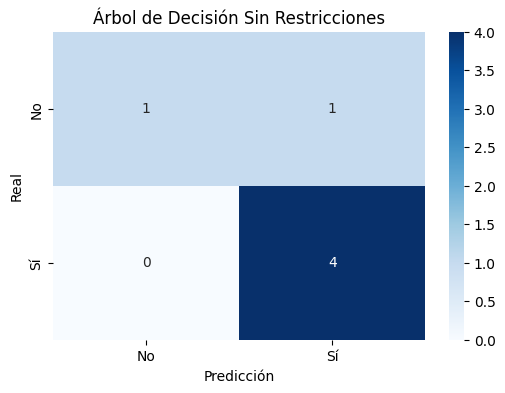

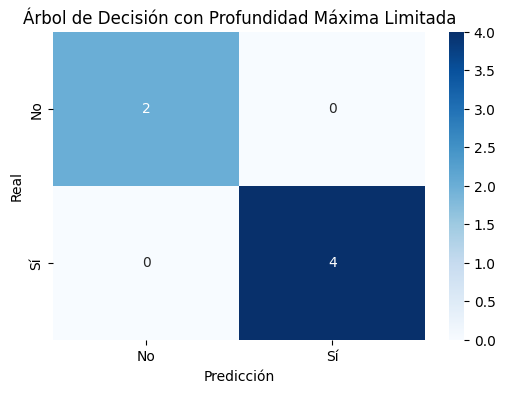

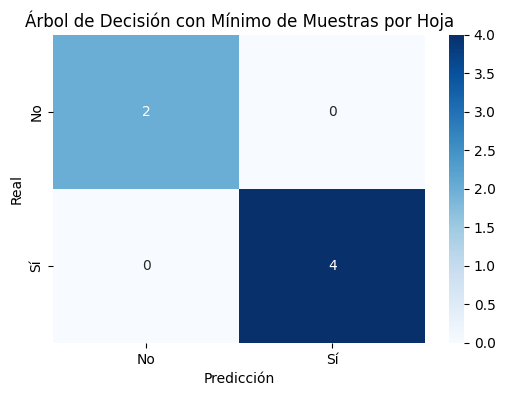

In [5]:
# Función para mostrar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()

# Visualizar las matrices de confusión
plot_confusion_matrix(y_test, y_pred_test_unrestricted, "Árbol de Decisión Sin Restricciones")
plot_confusion_matrix(y_test, y_pred_test_limited_depth, "Árbol de Decisión con Profundidad Máxima Limitada")
plot_confusion_matrix(y_test, y_pred_test_min_samples_leaf, "Árbol de Decisión con Mínimo de Muestras por Hoja")
